## Part 1) Image Classification

#### Set Random Seed, Load MNIST Data

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
random.seed(1234)

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# convert to 0s and 1s
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [7]:
# split the training data 
train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size = .16666, random_state = 1234)

#### Implement a series of neural network models

In [16]:
# define the model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit
result = model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.4962 - acc: 0.8418 - val_loss: 0.4233 - val_acc: 0.8676
Epoch 2/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.1647 - acc: 0.9511 - val_loss: 0.1228 - val_acc: 0.9630
Epoch 3/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0970 - acc: 0.9714 - val_loss: 0.1573 - val_acc: 0.9554
Epoch 4/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0674 - acc: 0.9795 - val_loss: 0.0932 - val_acc: 0.9723
Epoch 5/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0843 - val_acc: 0.9774
Epoch 6/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0348 - acc: 0.9894 - val_loss: 0.0869 - val_acc: 0.9792
Epoch 7/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0290 - acc: 0.9914 - val_loss: 0.0837 - 

Epoch 118/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0065 - acc: 0.9992 - val_loss: 0.1858 - val_acc: 0.9821
Epoch 119/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.1906 - val_acc: 0.9832
Epoch 120/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0067 - acc: 0.9992 - val_loss: 0.1810 - val_acc: 0.9836
Epoch 121/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0060 - acc: 0.9992 - val_loss: 0.1866 - val_acc: 0.9825
Epoch 122/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.1754 - val_acc: 0.9834
Epoch 123/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0075 - acc: 0.9992 - val_loss: 0.1946 - val_acc: 0.9830
Epoch 124/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0061 - acc: 0.9992 - val_loss: 0.1937 - val_acc: 0.9806
Epoch 125/200
50000/

In [18]:
# plotting the training and validation loss
training_error = result.history['val_loss']
training_accuracy = result.history['val_acc']

In [19]:
epochs = range(1, 201)

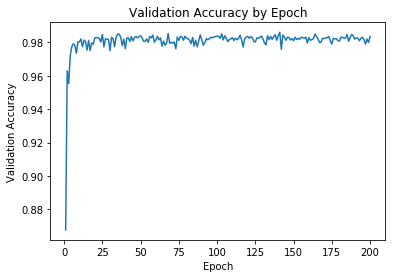

In [20]:
plt.plot(epochs, training_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by Epoch");

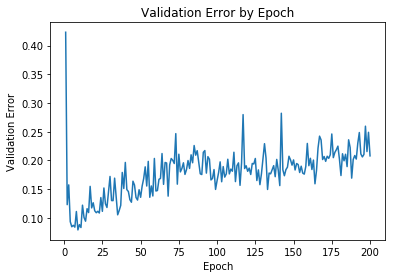

In [21]:
plt.plot(epochs, training_error)
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by Epoch");

By around the 10th epoch, the model's validation accuracy plateaus at around 98%. This is confirmed by checking the results against the graph. We can further note that following the 10th epoch there is a steady increase in our validation error from below 10% to above 20% with some fluctuations. There is overfitting of the data given that we can observe our training accuracy increase, but validation accuracy plateau; and that our validation error is decreasing only in the first few epochs.

#### Implement dropout

In [22]:
# add the drop out to all layers except the last
dropout_model = models.Sequential()

dropout_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(512, activation='relu'))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(512, activation='relu'))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(512, activation='relu'))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(10, activation='softmax'))

In [23]:
# compile the model
dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit
dropout_result = dropout_model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 27us/step - loss: 0.7163 - acc: 0.7625 - val_loss: 0.2316 - val_acc: 0.9305
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2646 - acc: 0.9230 - val_loss: 0.1524 - val_acc: 0.9539
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1987 - acc: 0.9446 - val_loss: 0.1380 - val_acc: 0.9588
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1636 - acc: 0.9539 - val_loss: 0.1068 - val_acc: 0.9680
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1430 - acc: 0.9598 - val_loss: 0.1062 - val_acc: 0.9673
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1272 - acc: 0.9637 - val_loss: 0.0958 - val_acc: 0.9738
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1182 - acc: 0.9671 - val_loss: 0.0917 - 

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0640 - acc: 0.9907 - val_loss: 0.1201 - val_acc: 0.9835
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0585 - acc: 0.9914 - val_loss: 0.1290 - val_acc: 0.9838
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0664 - acc: 0.9914 - val_loss: 0.1205 - val_acc: 0.9838
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0603 - acc: 0.9913 - val_loss: 0.1222 - val_acc: 0.9836
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0585 - acc: 0.9915 - val_loss: 0.1417 - val_acc: 0.9820
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0588 - acc: 0.9918 - val_loss: 0.1270 - val_acc: 0.9830
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0621 - acc: 0.9914 - val_loss: 0.1188 - val_acc: 0.9823
Epoch 125/200
50000/

In [24]:
# plotting the training and validation loss
drop_training_error = dropout_result.history['val_loss']
drop_training_accuracy = dropout_result.history['val_acc']

(0.96, 0.99)

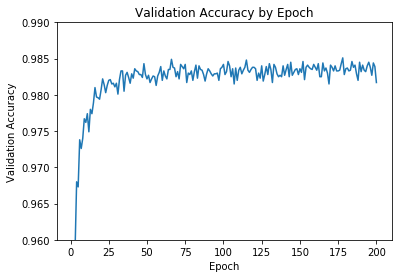

In [25]:
plt.plot(epochs, drop_training_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by Epoch")
plt.ylim(0.96, 0.99)

Text(0.5,1,'Validation Error by Epoch')

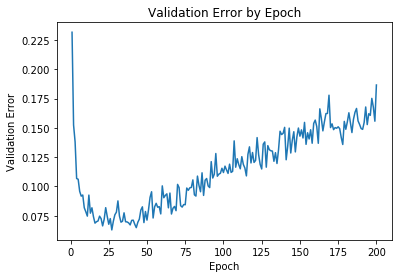

In [26]:
plt.plot(epochs, drop_training_error)
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by Epoch")

Relative to our main model, we should expect the drop out model to have a lower validation error given that it randomly chooses 50% of the nodes to remove. This is supported by the lower starting value and ending value of our validation error that is confirmed by our graph and print out results above. While validation error continues to increase like in the main model, it does not increase to the same levels as in the main model. Furthermore, we can observe that we do not plateau in our validation accuracy until a later epoch in the drop out model - around the 50th epoch.

#### Weight regularization

In [8]:
from keras import regularizers

In [9]:
# L1 regularization
l1_model = models.Sequential()
l1_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28 * 28,)))

l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))

l1_model.add(layers.Dense(10, activation='softmax'))

# L2 regularization
l2_model = models.Sequential()

l2_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))

l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


l2_model.add(layers.Dense(10, activation='softmax'))

In [10]:
# Fit the model
l1_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l1_fit = l1_model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

l2_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l2_fit = l2_model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 38us/step - loss: 13.5675 - acc: 0.6580 - val_loss: 4.0726 - val_acc: 0.7217
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 3.0111 - acc: 0.7931 - val_loss: 2.3794 - val_acc: 0.8447
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 2.1890 - acc: 0.8310 - val_loss: 1.9322 - val_acc: 0.8749
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.8539 - acc: 0.8592 - val_loss: 1.6921 - val_acc: 0.8883
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.6748 - acc: 0.8737 - val_loss: 1.5851 - val_acc: 0.8875
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.5456 - acc: 0.8870 - val_loss: 1.5028 - val_acc: 0.8862
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.4581 - acc: 0.8921 - val_loss: 1.4520 -

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9166 - acc: 0.9545 - val_loss: 0.9228 - val_acc: 0.9491
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9136 - acc: 0.9561 - val_loss: 0.9182 - val_acc: 0.9524
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9127 - acc: 0.9558 - val_loss: 0.9454 - val_acc: 0.9446
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9147 - acc: 0.9553 - val_loss: 0.9109 - val_acc: 0.9552
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9119 - acc: 0.9556 - val_loss: 0.9097 - val_acc: 0.9547
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9137 - acc: 0.9555 - val_loss: 0.9217 - val_acc: 0.9504
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9150 - acc: 0.9555 - val_loss: 0.9196 - val_acc: 0.9529
Epoch 125/200
50000/

50000/50000 [==============================] - 1s 16us/step - loss: 0.1126 - acc: 0.9885 - val_loss: 0.1517 - val_acc: 0.9761
Epoch 35/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1102 - acc: 0.9893 - val_loss: 0.1647 - val_acc: 0.9738
Epoch 36/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1108 - acc: 0.9888 - val_loss: 0.1786 - val_acc: 0.9688
Epoch 37/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1059 - acc: 0.9900 - val_loss: 0.1533 - val_acc: 0.9756
Epoch 38/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1088 - acc: 0.9892 - val_loss: 0.1516 - val_acc: 0.9749
Epoch 39/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1062 - acc: 0.9897 - val_loss: 0.1367 - val_acc: 0.9796
Epoch 40/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1072 - acc: 0.9889 - val_loss: 0.1444 - val_acc: 0.9773
Epoch 41/200
50000/50000 [==============

50000/50000 [==============================] - 1s 16us/step - loss: 0.0873 - acc: 0.9914 - val_loss: 0.1461 - val_acc: 0.9732
Epoch 94/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0851 - acc: 0.9918 - val_loss: 0.1526 - val_acc: 0.9701
Epoch 95/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0865 - acc: 0.9913 - val_loss: 0.1406 - val_acc: 0.9746
Epoch 96/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0844 - acc: 0.9920 - val_loss: 0.1656 - val_acc: 0.9684
Epoch 97/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0867 - acc: 0.9907 - val_loss: 0.1315 - val_acc: 0.9774
Epoch 98/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0822 - acc: 0.9924 - val_loss: 0.1343 - val_acc: 0.9760
Epoch 99/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0889 - acc: 0.9910 - val_loss: 0.1199 - val_acc: 0.9803
Epoch 100/200
50000/50000 [=============

In [14]:
# Plot the training losses of all 4 models
l1_training_error = l1_fit.history['val_loss']
l1_training_acc = l1_fit.history['val_acc']

l2_training_error = l2_fit.history['val_loss']
l2_training_acc = l2_fit.history['val_acc']

epochs = range(1, 201)

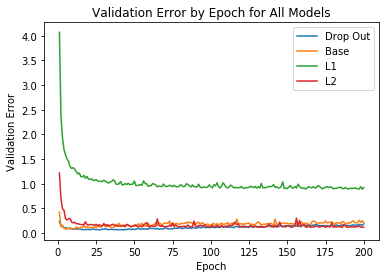

In [29]:
plt.plot(epochs, drop_training_error, label='Drop Out' )
plt.plot(epochs, training_error, label='Base')
plt.plot(epochs, l1_training_error, label='L1')
plt.plot(epochs, l2_training_error, label='L2')
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by Epoch for All Models")
plt.legend();

Basd on the graph above, it appears that both Drop Out, the base model, and L2 which roughly have the same validation error as number of epochs increases.

#### Final model

In [30]:
# Find lowest validation loss score
main_min = np.min(training_error)
drop_min = np.min(drop_training_error)
l1_min = np.min(l1_training_error)
l2_min = np.min(l2_training_error)
print("Main Model Min:", main_min)
print("Drop Model Min:", drop_min)
print("L1 Reg Model Min:", l1_min)
print("L2 Reg Model Min:", l2_min)

Main Model Min: 0.07880673047304153
Drop Model Min: 0.06291598353385926
L1 Reg Model Min: 0.8864467202186584
L2 Reg Model Min: 0.11350316616296768


In [31]:
# Find Minimum Epoch
new_epoch_count =  np.argmin(drop_training_error) + 1
print("The optimal epoch for the main baseline model is:", new_epoch_count)

The optimal epoch for the main baseline model is: 27


In [34]:
dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
full_fit = dropout_model.fit(train_images, train_labels, epochs=new_epoch_count, batch_size=512)
test_loss, test_acc = dropout_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Epoch 1/27
50000/50000 [==============================] - 1s 24us/step - loss: 0.1126 - acc: 0.9898
Epoch 2/27
50000/50000 [==============================] - 1s 16us/step - loss: 0.0986 - acc: 0.9903
Epoch 3/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0869 - acc: 0.9914
Epoch 4/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0889 - acc: 0.9909
Epoch 5/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0887 - acc: 0.9911
Epoch 6/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0880 - acc: 0.9910
Epoch 7/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0854 - acc: 0.9914
Epoch 8/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0929 - acc: 0.9909
Epoch 9/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0859 - acc: 0.9912
Epoch 10/27
50000/50000 [==============================] - 1s 15us/step - loss: 0.0856 - acc: 0.9908

This final model performs slightly better than the baseline model from section 2.1 in the book. With the test accuracy being slightly higher (0.9818 > 0.9785). 

## Part 2) Scalar Regression

In [60]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [61]:
# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [62]:
def build_model(layer_list):
    '''
    The layer_list is a list of integers, each denoting a layer to
    add with the corresponding number of nodes
    '''
    model = models.Sequential()
    
    for node_count in layer_list:
        model.add(layers.Dense(node_count, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [63]:
def cross_validate(model_structure):
    '''
    Given a model structure, returns the avg MSE over 10 k-fold
    cross validation training
    
    This facilitates rapid testing of models
    '''
    
    kf = KFold(n_splits = k)
    cur_fold = 0
    for train_index, test_index in kf.split(train_data):
        cur_fold +=1 

        # Partition the data
        x_train, x_test = train_data[train_index], train_data[test_index]
        y_train, y_test = train_targets[train_index], train_targets[test_index]


        model = build_model(model_structure)
        model.fit(x_train, y_train, epochs=num_epochs, batch_size=1)
        val_mse, val_mae = model.evaluate(x_test, y_test)
        all_scores.append(val_mse)
        print("K-FOLD = {}| MSE = {}".format(cur_fold, val_mse ))

    mean_score = np.mean(all_scores)
    return mean_score

In [64]:
from sklearn.model_selection import KFold
k = 10
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []

In [65]:
# Use functionality to determine optimal node count, given one layer
node_sizes = np.arange(40, 120, 10)
scores = []
for count in node_sizes:
    structure = [count]
    score = cross_validate(structure)
    print("Layer 1 has {} nodes - yields MSE = {}".format(count, score))
    scores.append(score)

min_mse_size = node_sizes[ np.argmin(scores) ]
print("With 1 layer optimal node count is:", min_mse_size)

# quick plot of MSE as function of node size
plt.plot(node_sizes, scores)
plt.show()

AttributeError: 'list' object has no attribute 'Sequential'

In [58]:
# # Use functionality to determine optimal node count, given one layer
# node_sizes = np.arange(40, 120, 10)
# scores = []
# for count in node_sizes:
#     structure = [count]
#     score = cross_validate(structure)
#     print("Layer 1 has {} nodes - yields MSE = {}".format(count, score))
#     scores.append(score)

# min_mse_size = node_sizes[ np.argmin(scores) ]
# print("With 1 layer optimal node count is:", min_mse_size)

# # quick plot of MSE as function of node size
# plt.plot(node_sizes, scores)
# plt.show()

In [57]:
final = build_model([40, 40, 40])

AttributeError: 'list' object has no attribute 'Sequential'

In [51]:
final.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

test_loss, test_acc = final.evaluate(test_data, test_targets)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

NameError: name 'final' is not defined